## Maximum Likelihood Estimation (MLE) of the Mean for a Gaussian Distribution

### Overview
In the following Python code, we estimate the mean $\mu$ of a Gaussian distribution under the assumption that the variance $\sigma^2$ is known. The data points are treated as independent and identically distributed (i.i.d.) samples.

---

### Gaussian Model
We assume each data point $x_i$ is drawn from:

\begin{align}
p(x_i \mid \mu) = \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left( -\frac{(x_i-\mu)^2}{2\sigma^2} \right)\nonumber
\end{align}

---

### Likelihood and Log-Likelihood
Given a dataset $\{x_1, \dots, x_n\}$, the likelihood is:

\begin{align}
L(\mu) = \prod_{i=1}^n p(x_i \mid \mu)\nonumber
\end{align}

Taking the natural logarithm yields the log-likelihood used in the code:

\begin{align}
\log L(\mu) = -\frac{n}{2}\log(2\pi\sigma^2)
- \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2\nonumber
\end{align}

This expression is implemented in:

```python
def log_likelihood(mu, data, sigma):


True mean = 4.466926674160033
Numerical MLE = 4.466926665287451
Curvature at MLE = 49.999968609881755
Error from MLE = 1/curvature  =  0.020000012556055182


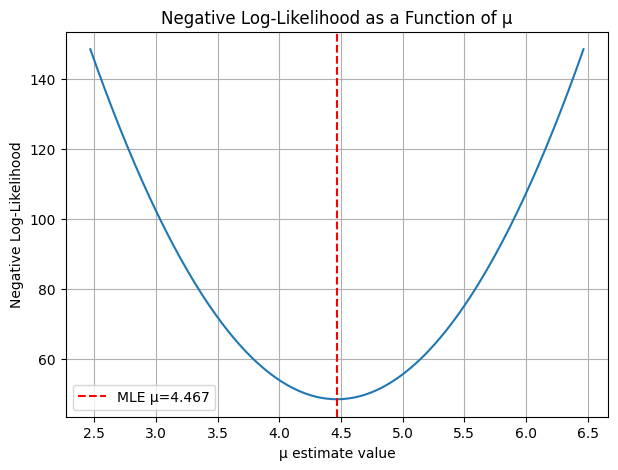

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ---- Sample data ----
data = np.random.uniform(4,5,50)
# ---- Known variance ----
sigma2 = 1.0
sigma = np.sqrt(sigma2)

# ---- Log-likelihood function ----
def log_likelihood(mu, data, sigma):
    n = len(data)
    return -n/2 * np.log(2*np.pi*sigma**2) - np.sum((data - mu)**2) / (2*sigma**2)

def neg_log_likelihood(mu):
    return -log_likelihood(mu, data, sigma)

# ---- Analytical MLE ----
true_mean = np.mean(data)
print("True mean =", true_mean)

# ---- Numerical MLE ----
result = minimize(neg_log_likelihood, x0=0.0)
mu_mle_numeric = result.x[0]
print("Numerical MLE =", mu_mle_numeric)

# ---- Compute curvature numerically via finite difference ----
def second_derivative(f, x, h=1e-5):
    return (f(x+h) - 2*f(x) + f(x-h)) / h**2

curvature = second_derivative(neg_log_likelihood, mu_mle_numeric)
print("Curvature at MLE =", curvature)
print("Error from MLE = 1/curvature  = ",1/curvature)

# ---- Plot negative log-likelihood vs mu ----
mu_values = np.linspace(mu_mle_numeric - 2, mu_mle_numeric + 2, 200)
nll_values = [neg_log_likelihood(mu) for mu in mu_values]

plt.figure(figsize=(7,5))
plt.plot(mu_values, nll_values)
plt.axvline(mu_mle_numeric, color='r', linestyle='--', label=f"MLE μ={mu_mle_numeric:.3f}")
plt.xlabel("μ estimate value")
plt.ylabel("Negative Log-Likelihood")
plt.title("Negative Log-Likelihood as a Function of μ")
plt.legend()
plt.grid(True)
plt.show()



===== Sample size n = 10 =====
True mean = 4.659287721020329
Numerical MLE = 4.659287724042598
Curvature at MLE = 10.000018590972102
Std error estimate = 1/sqrt(curvature) = 0.316227472068169


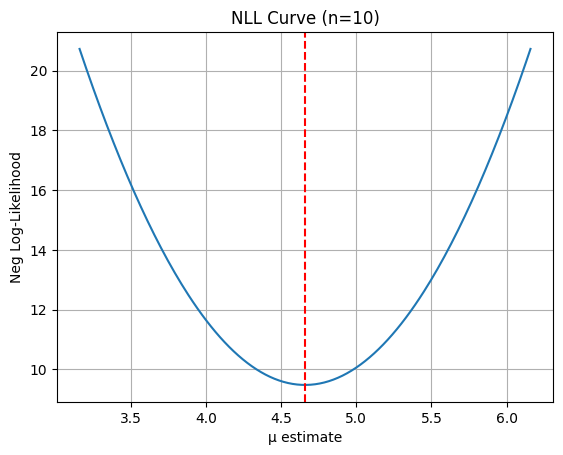


===== Sample size n = 30 =====
True mean = 4.396750840972631
Numerical MLE = 4.396750799567792
Curvature at MLE = 30.000002482211126
Std error estimate = 1/sqrt(curvature) = 0.18257417828192793


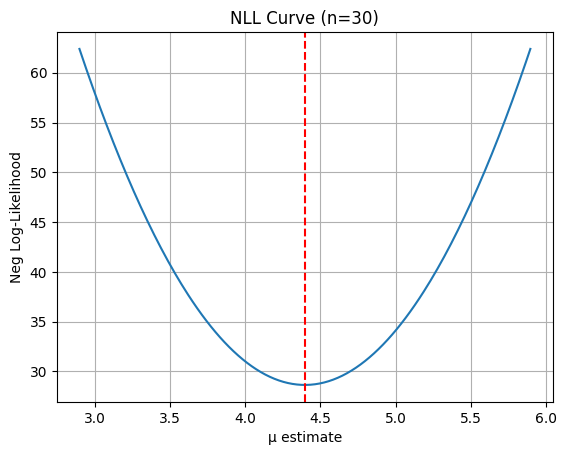


===== Sample size n = 50 =====
True mean = 4.473172752361486
Numerical MLE = 4.473172733712091
Curvature at MLE = 49.999968609881755
Std error estimate = 1/sqrt(curvature) = 0.14142140062966135


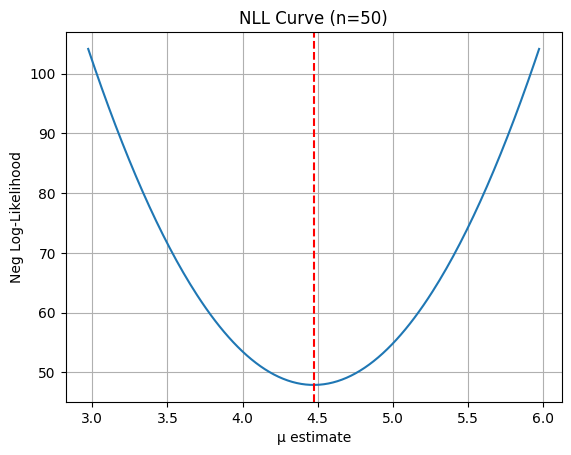


===== Sample size n = 100 =====
True mean = 4.455149539807492
Numerical MLE = 4.455149516905519
Curvature at MLE = 100.00022143685781
Std error estimate = 1/sqrt(curvature) = 0.09999988928175498


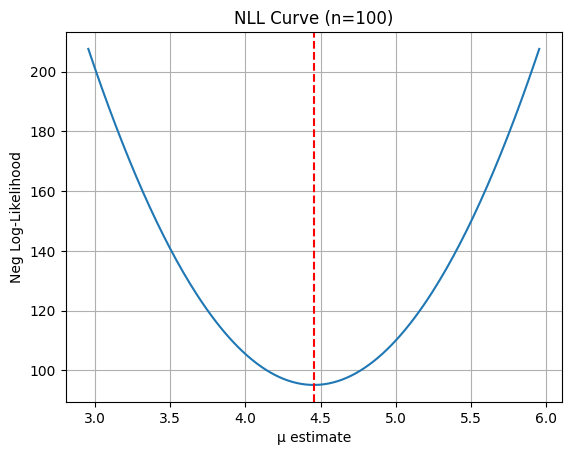


===== Sample size n = 300 =====
True mean = 4.520597999481344
Numerical MLE = 4.520597973730816
Curvature at MLE = 300.00023798493197
Std error estimate = 1/sqrt(curvature) = 0.057735004018865436


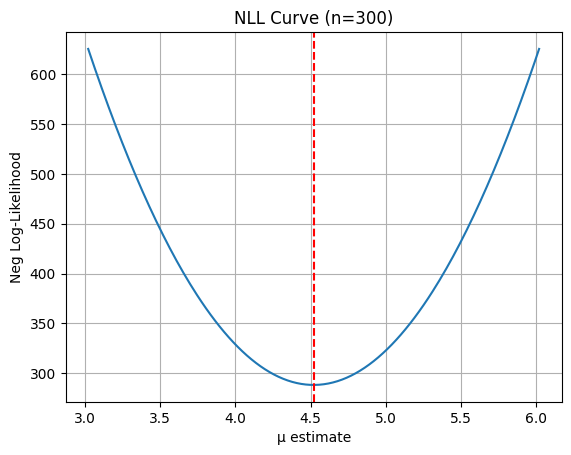

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ---- Known variance ----
sigma2 = 1.0
sigma = np.sqrt(sigma2)

# ---- Log-likelihood function ----
def log_likelihood(mu, data, sigma):
    n = len(data)
    return -n/2 * np.log(2*np.pi*sigma**2) - np.sum((data - mu)**2) / (2*sigma**2)

def neg_log_likelihood(mu, data):
    return -log_likelihood(mu, data, sigma)

# ---- Second derivative numerical approximation ----
def second_derivative(f, x, h=1e-5):
    return (f(x+h) - 2*f(x) + f(x-h)) / h**2

# ---- Sample sizes to test ----
sample_sizes = [10, 30, 50, 100, 300]

# plt.figure(figsize=(12, 16))
plot_index = 1

for n in sample_sizes:
    data = np.random.uniform(4, 5, n)

    # Analytical MLE
    true_mean = np.mean(data)

    # Numerical MLE
    result = minimize(lambda mu: neg_log_likelihood(mu, data), x0=0.0)
    mu_mle_numeric = result.x[0]

    # Curvature at MLE
    curvature = second_derivative(lambda mu: neg_log_likelihood(mu, data), mu_mle_numeric)

    print(f"\n===== Sample size n = {n} =====")
    print("True mean =", true_mean)
    print("Numerical MLE =", mu_mle_numeric)
    print("Curvature at MLE =", curvature)
    print("Std error estimate = 1/sqrt(curvature) =", 1/np.sqrt(curvature))

    # ---- Plot negative log-likelihood ----
    mu_values = np.linspace(mu_mle_numeric - 1.5, mu_mle_numeric + 1.5, 200)
    nll_values = [neg_log_likelihood(mu, data) for mu in mu_values]

    # plt.subplot(3, 2, plot_index)
    plt.plot(mu_values, nll_values)
    plt.axvline(mu_mle_numeric, color='r', linestyle='--')
    plt.title(f"NLL Curve (n={n})")
    plt.xlabel("μ estimate")
    plt.ylabel("Neg Log-Likelihood")
    plt.grid(True)

    plot_index += 1

    # plt.tight_layout()
    plt.show()


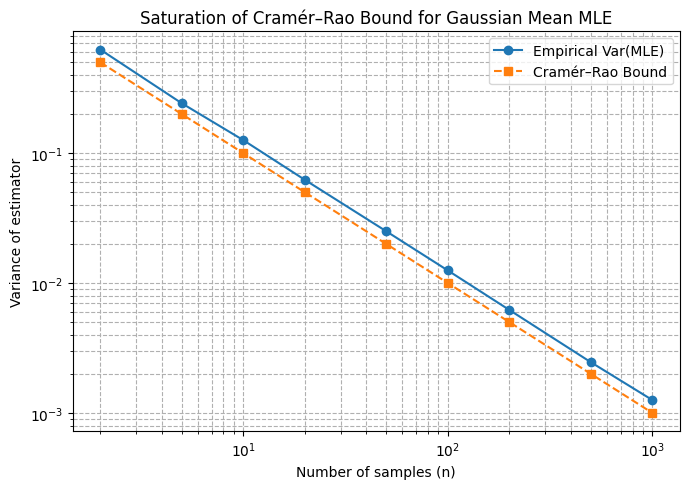

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# True parameters
mu_true = 0.0
sigma2 = 1.0
sigma = np.sqrt(sigma2)

# Range of sample sizes
n_values = np.array([2, 5, 10, 20, 50, 100, 200, 500, 1000])

# Number of repetitions for estimating variance
repetitions = 10000

empirical_variances = []

for n in n_values:
    # Generate repeated datasets and compute MLE (sample mean)
    estimates = []
    for _ in range(repetitions):
        data = np.random.normal(mu_true, sigma, n)+0.5*np.random.normal(0,1, n)
        mu_mle = np.mean(data)
        estimates.append(mu_mle)

    # Empirical variance of the estimator
    empirical_variance = np.std(estimates)**2
    empirical_variances.append(empirical_variance)

# Compute CRB = sigma^2 / n
crb_values = sigma2 / n_values

# Plotting
plt.figure(figsize=(7,5))
plt.plot(n_values, empirical_variances, 'o-', label='Empirical Var(MLE)')
plt.plot(n_values, crb_values, 's--', label='Cramér–Rao Bound')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples (n)')
plt.ylabel('Variance of estimator')
plt.title('Saturation of Cramér–Rao Bound for Gaussian Mean MLE')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


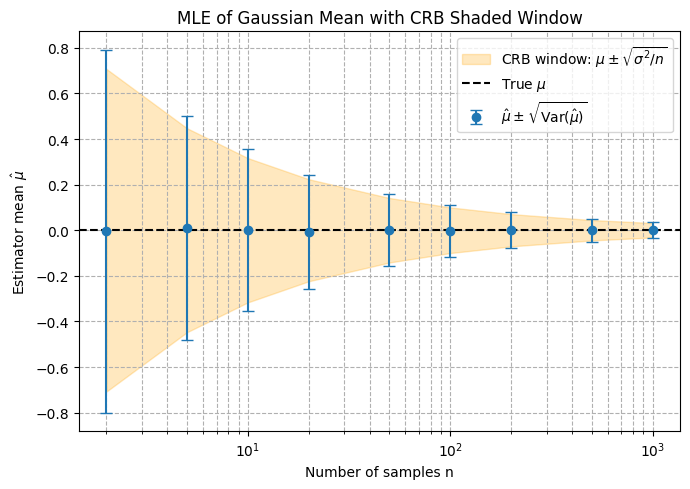

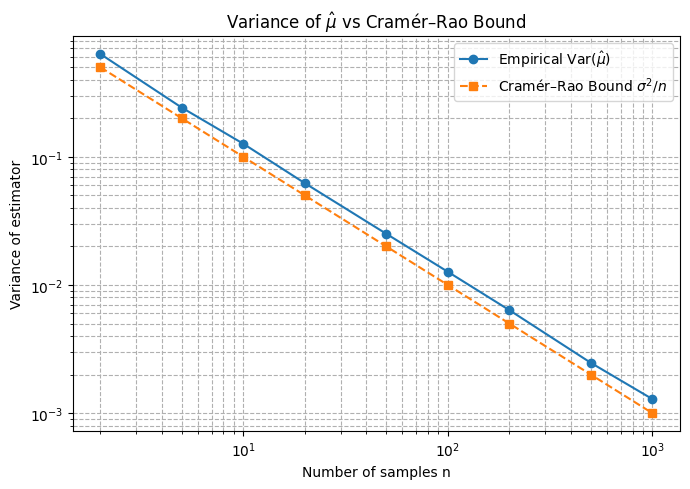

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- True Gaussian parameters ---
mu_true = 0.0
sigma2 = 1.0          # true variance of the data
sigma = np.sqrt(sigma2)

# --- Sample sizes (number of repetitions n) ---
n_values = np.array([2, 5, 10, 20, 50, 100, 200, 500, 1000])

# --- Number of Monte Carlo repetitions for each n ---
repetitions = 5000

mean_estimates = []   # E[ \hat{mu} ] for each n
var_estimates = []    # Var( \hat{mu} ) for each n

for n in n_values:
    data = np.random.normal(mu_true, sigma, size=(repetitions, n))+0.5*np.random.normal(0,1, size=(repetitions, n))
    mu_hats = np.mean(data, axis=1)

    mean_estimates.append(np.mean(mu_hats))
    var_estimates.append(np.var(mu_hats, ddof=1))

mean_estimates = np.array(mean_estimates)
var_estimates = np.array(var_estimates)

# --- Cramér–Rao bound and std window ---
crb_var = sigma2 / n_values
crb_std = np.sqrt(crb_var)

# =========================
# 1) Plot: μ ± σ with CRB shaded window
# =========================
plt.figure(figsize=(7, 5))

# Shaded CRB band around the true mean
plt.fill_between(
    n_values,
    mu_true - crb_std,
    mu_true + crb_std,
    color='orange',
    alpha=0.25,
    label=r'CRB window: $\mu \pm \sqrt{\sigma^2/n}$'
)

# Errorbar from Monte-Carlo simulation
plt.errorbar(
    n_values,
    mean_estimates,
    yerr=np.sqrt(var_estimates),
    fmt='o',
    capsize=4,
    label=r'$\hat\mu \pm \sqrt{\mathrm{Var}(\hat\mu)}$'
)

plt.axhline(mu_true, linestyle='--', color='k', label=r'True $\mu$')

plt.xscale('log')
plt.xlabel('Number of samples n')
plt.ylabel(r'Estimator mean $\hat\mu$')
plt.title(r'MLE of Gaussian Mean with CRB Shaded Window')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# =========================
# 2) Variance vs CRB (unchanged)
# =========================
plt.figure(figsize=(7, 5))
plt.plot(n_values, var_estimates, 'o-', label=r'Empirical Var$(\hat\mu)$')
plt.plot(n_values, crb_var, 's--', label=r'Cramér–Rao Bound $\sigma^2/n$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples n')
plt.ylabel(r'Variance of estimator')
plt.title(r'Variance of $\hat\mu$ vs Cramér–Rao Bound')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()

plt.show()


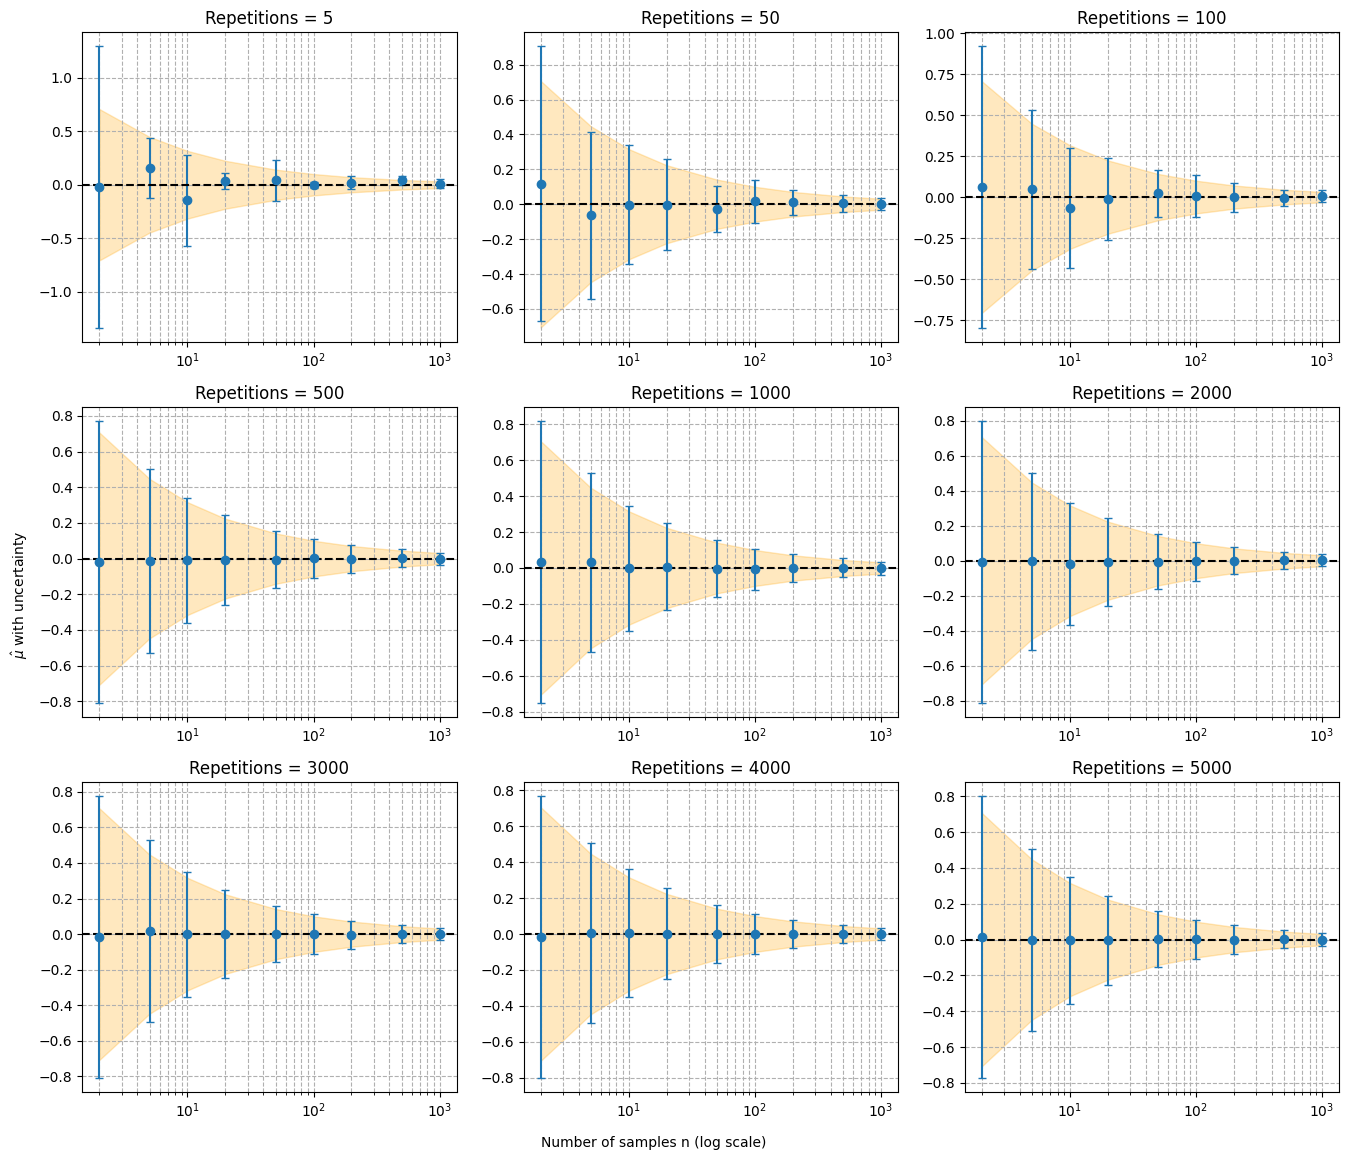

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- True Gaussian parameters ---
mu_true = 0.0
sigma2 = 1.0
sigma = np.sqrt(sigma2)

# --- Sample sizes (number of samples n) ---
n_values = np.array([2, 5, 10, 20, 50, 100, 200, 500, 1000])

# --- Repetition levels requested ---
repetition_levels = [5, 50, 100, 500, 1000, 2000, 3000, 4000, 5000]

# --- CRB window (same for all subplots) ---
crb_std = np.sqrt(sigma2 / n_values)

# --- Subplots (3x3 layout for 9 repetition settings) ---
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, repetitions in enumerate(repetition_levels):

    mean_estimates = []
    std_estimates  = []

    for n in n_values:
        data = np.random.normal(mu_true, sigma, size=(repetitions, n))+0.5*np.random.normal(0,1, size=(repetitions, n))
        mu_hats = np.mean(data, axis=1)

        mean_estimates.append(np.mean(mu_hats))
        std_estimates.append(np.std(mu_hats, ddof=1))

    mean_estimates = np.array(mean_estimates)
    std_estimates = np.array(std_estimates)

    ax = axes[idx]

    # CRB shaded region
    ax.fill_between(
        n_values,
        mu_true - crb_std,
        mu_true + crb_std,
        color='orange',
        alpha=0.25,
        label='CRB window'
    )

    # Monte-Carlo mean ± std
    ax.errorbar(
        n_values,
        mean_estimates,
        yerr=std_estimates,
        fmt='o',
        capsize=3,
        label=r'$\hat{\mu} \pm \sigma_{\hat{\mu}}$'
    )

    # True mean
    ax.axhline(mu_true, linestyle='--', color='k')

    ax.set_xscale('log')
    ax.set_title(f"Repetitions = {repetitions}")
    ax.grid(True, which="both", ls="--")

# Shared labels
fig.text(0.5, 0.04, 'Number of samples n (log scale)', ha='center')
fig.text(0.04, 0.5, r'$\hat{\mu}$ with uncertainty', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


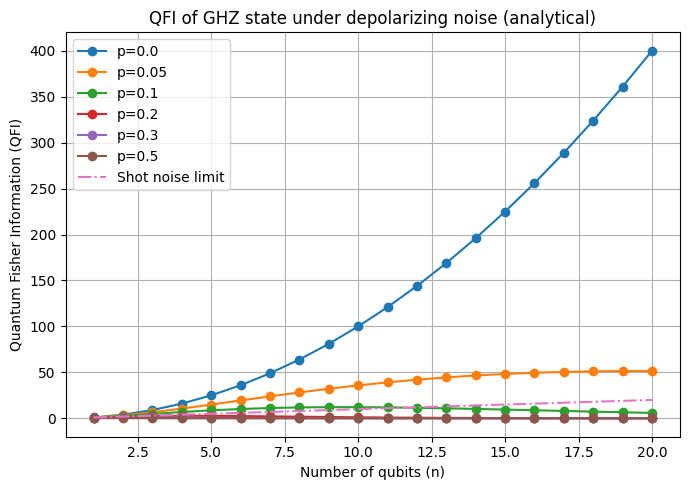

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_values = np.arange(1, 21)  # up to 20 qubits
p_values = [0.0, 0.05, 0.1, 0.2, 0.3, 0.5]

# Analytical QFI for GHZ under independent depolarizing noise: F_Q = n^2 * (1-p)^(2n)
def qfi_ghz(n, p):
    return n**2 * (1 - p)**(2 * n)

plt.figure(figsize=(7,5))
for p in p_values:
    qfis = [qfi_ghz(n, p) for n in n_values]
    plt.plot(n_values, qfis, 'o-', label=f"p={p}")

plt.plot(n_values,n_values,"-.", label="Shot noise limit")
plt.xlabel("Number of qubits (n)")
plt.ylabel("Quantum Fisher Information (QFI)")
plt.title("QFI of GHZ state under depolarizing noise (analytical)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


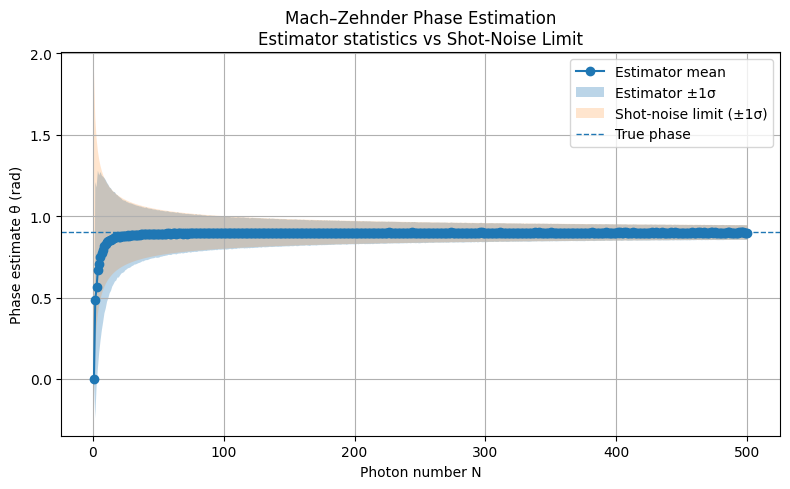

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Parameters
# ---------------------------

np.random.seed(0)

theta_true = 0.9           # true phase (rad), assumed small
N_min, N_max = 1, 500      # photons per run
N_list = np.arange(N_min, N_max + 1)

n_trials = 11000            # independent repetitions for statistics

# Storage
theta_mean = np.zeros_like(N_list, dtype=float)
theta_var  = np.zeros_like(N_list, dtype=float)

# ---------------------------
# Monte Carlo simulation
# ---------------------------

for idx, N in enumerate(N_list):

    # MZI probabilities from text
    p1 = np.sin(theta_true / 2.0)**2

    est_samples = []

    for _ in range(n_trials):
        # Sample photon counts at detectors
        N1 = np.random.binomial(N, p1)
        N2 = N - N1

        arg = (N1 - N2) / N
        arg = np.clip(arg, -1.0, 1.0)
        theta_hat = np.arccos(arg)

        # ---- FIX TO AVOID π ESTIMATES ----
        # choose the branch closer to theta_true
        if abs(theta_hat - theta_true) > abs((np.pi - theta_hat) - theta_true):
            theta_hat = np.pi - theta_hat

        est_samples.append(theta_hat)

    est_samples = np.array(est_samples)

    theta_mean[idx] = np.mean(est_samples)
    theta_var[idx]  = np.var(est_samples, ddof=1)

theta_std = np.sqrt(theta_var)

# ---------------------------
# Shot noise limit from Eq. (6)
# ---------------------------

shot_noise_std = 1.0 / np.sqrt(N_list)

# ---------------------------
# Plotting
# ---------------------------

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(N_list, theta_mean, marker='o', label='Estimator mean')

ax.fill_between(N_list, theta_mean - theta_std, theta_mean + theta_std,
                alpha=0.3, label='Estimator ±1σ')

ax.fill_between(N_list, theta_true - shot_noise_std,
                theta_true + shot_noise_std,
                alpha=0.2, label='Shot-noise limit (±1σ)')

ax.axhline(theta_true, linestyle='--', linewidth=1, label='True phase')

ax.set_xlabel('Photon number N')
ax.set_ylabel('Phase estimate θ (rad)')
ax.set_title('Mach–Zehnder Phase Estimation\nEstimator statistics vs Shot-Noise Limit')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


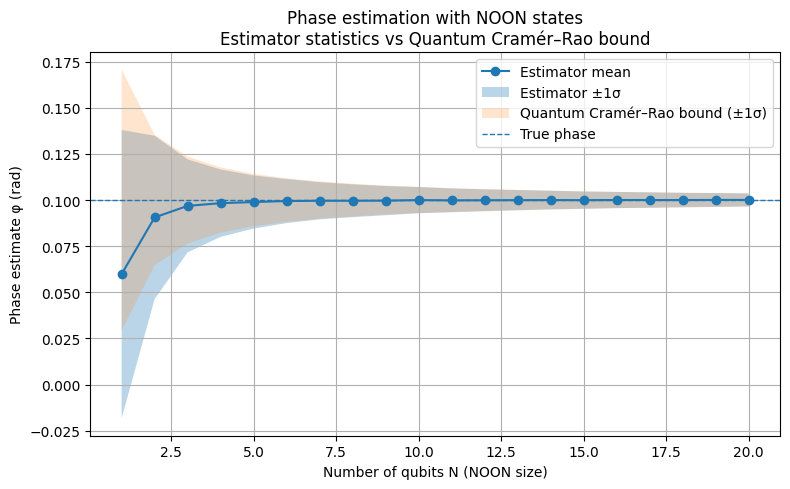

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Simulation parameters
# ---------------------------

np.random.seed(42)

phi_true = 0.1        # True phase (rad), chosen small so that N*phi_true < pi for N up to N_max
N_min, N_max = 1, 20  # Range of NOON sizes (number of qubits/photons)
N_list = np.arange(N_min, N_max + 1)

M_shots = 200         # Number of measurements per N (per experiment)
n_trials = 10000       # Number of independent experiments to build statistics

# ---------------------------
# Storage for statistics
# ---------------------------

phi_mean = np.zeros_like(N_list, dtype=float)
phi_var = np.zeros_like(N_list, dtype=float)

# ---------------------------
# Main Monte Carlo loop
# ---------------------------

for idx, N in enumerate(N_list):
    # Quantum probability for outcome + given NOON state of size N and phase phi_true
    p_plus = 0.5 * (1.0 + np.cos(N * phi_true))

    est_samples = []

    for _ in range(n_trials):
        # Simulate M_shots binary outcomes: +1 ("plus") or -1 ("minus")
        # We only need the count of "plus" outcomes
        k_plus = np.random.binomial(M_shots, p_plus)

        # Empirical frequency
        f_plus = k_plus / M_shots

        # Invert the measurement relation:
        #   f_plus ≈ (1 + cos(N * phi))/2  =>  cos(N * phi_hat) ≈ 2*f_plus - 1
        arg = 2.0 * f_plus - 1.0

        # Numerical safety: clip into [-1, 1] for arccos
        arg = np.clip(arg, -1.0, 1.0)

        # For 0 < N*phi_true < pi, cos is monotonic, so arccos gives a unique phase in [0, pi]
        phi_hat = np.arccos(arg) / N

        est_samples.append(phi_hat)

    est_samples = np.array(est_samples)
    phi_mean[idx] = np.mean(est_samples)
    phi_var[idx] = np.var(est_samples, ddof=1)  # Unbiased sample variance

# Standard deviation of estimator
phi_std = np.sqrt(phi_var)

# ---------------------------
# Quantum Cramér–Rao bound
# ---------------------------
# For a NOON state with N particles, quantum Fisher information F_Q = N^2.
# With M_shots independent repetitions, Var(phi_hat) >= 1 / (M_shots * N^2).
# We'll plot the corresponding ±1σ band around the true phase.

sigma_qcrb = 1.0 / np.sqrt(M_shots * N_list**2)

# ---------------------------
# Plotting
# ---------------------------

fig, ax = plt.subplots(figsize=(8, 5))

# Estimator mean and ±1σ band
ax.plot(N_list, phi_mean, marker='o', label='Estimator mean')
ax.fill_between(N_list, phi_mean - phi_std, phi_mean + phi_std,
                alpha=0.3, label='Estimator ±1σ')

# QCRB band around the true phase
ax.fill_between(N_list, phi_true - sigma_qcrb, phi_true + sigma_qcrb,
                alpha=0.2, label='Quantum Cramér–Rao bound (±1σ)')

# True phase line
ax.axhline(phi_true, linestyle='--', linewidth=1, label='True phase')

ax.set_xlabel('Number of qubits N (NOON size)')
ax.set_ylabel('Phase estimate φ (rad)')
ax.set_title('Phase estimation with NOON states\nEstimator statistics vs Quantum Cramér–Rao bound')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
